In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy
import seaborn as sns
import plotly.graph_objects as go
import warnings
import math
import astropy.constants as const
warnings.filterwarnings("ignore")

earth_Mass = const.M_earth.value*1000 #g
earth_Radius = const.R_earth.value*100
earth_Volume = 4/3 * math.pi * earth_Radius**3
earth_density = earth_Mass / earth_Volume
from IPython.display import clear_output


In [2]:
dataEA = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Exoplanet_Archive.csv",delimiter=",")
dataLI = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\STPM_improved_210721.csv",delimiter=",")
planet_name_LI        = list(dataLI["Star"]+" "+dataLI["Planet"])

earth_like_rocky  = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Mass_Radius_Curves\Earth-like Rocky (32.5% Fe+67.5% MgSiO3).txt",delimiter = "\t")
H20_50_500K       = pd.read_csv(r"C:\Users\silke\OneDrive\Skrivebord\Thesis\Mass_Radius_Curves\50% H2O (50% Earth-like rocky core + 50% H2O layer by mass)_500 K_1mili-bar surface temprture.txt",delimiter = "\t")

In [3]:
# Luque Impoved
planet_id_LI         = dataLI.ID
star_name_LI         = dataLI.Star
planet_letter_LI     = dataLI.Planet

radius_LI            = dataLI.R_Rterra            # [Earth Radius]
radius_unc_up_LI     = dataLI.euR_Rterra          # [Earth Radius] Upper Unc.
radius_unc_low_LI    = dataLI.edR_Rterra          # [Earth Radius] Lower Unc.

mass_LI              = dataLI.M_Mterra            # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]
mass_unc_up_LI       = dataLI.euM_Mterra          # [Earth Mass] Upper Unc.
mass_unc_low_LI      = dataLI.edM_Mterra          # [Earth Mass] Lower Unc.

density_LI           = dataLI[dataLI.columns[32]]  # [g/cm**3]
density_unc_up_LI    = dataLI[dataLI.columns[33]]  # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_LI   = dataLI[dataLI.columns[34]]  # [g/cm**3] Planet Density Lower Unc
pl_eq_LI             = dataLI.Teq_K                # [K] Equilibrium Temperature
disc_year_EA         = dataEA.disc_year

# Exoplanet Archive
planet_name_EA       = dataEA.pl_name
planet_id_EA         = list(range(0,len(planet_name_EA)))

radius_EA            = dataEA.pl_rade            # [Earth Radius]
period_EA            = dataEA.pl_orbper          # [days]
radius_unc_up_EA     = dataEA.pl_radeerr1        # [Earth Radius] Upper Unc.
radius_unc_low_EA    = dataEA.pl_radeerr2        # [Earth Radius] Lower Unc.
mass_EA              = dataEA.pl_bmasse          # [Earth Mass] - Planet Mass or Mass*sin(i) [Earth Mass]

mass_unc_up_EA       = dataEA.pl_bmasseerr1      # [Earth Mass] Upper Unc.
mass_unc_low_EA      = dataEA.pl_bmasseerr2      # [Earth Mass] Lower Unc.

density_EA           = dataEA.pl_dens            # [g/cm**3]
density_unc_up_EA    = dataEA.pl_denserr1        # [g/cm**3] Planet Density Upper Unc. 
density_unc_low_EA   = dataEA.pl_denserr2        # [g/cm**3] Planet Density Lower Unc. 
st_spectype_EA       = dataEA.st_spectype        # Spectral type of star
pl_eq_EA             = dataEA.pl_eqt             # [K] Equilibrium Temperature
st_eff_EA            = dataEA.st_teff            # Star effective temprature
st_eff_up_EA         = dataEA.st_tefferr1        # Star upper err effective temprature
st_eff_low_EA        = dataEA.st_tefferr2        # Star lower err effective temprature
for i in range(0,len(planet_name_LI)):
    if planet_name_LI[i] == 'CD-60 8051 b':
        planet_name_LI[i] = 'L 168-9 b'
    if planet_name_LI[i] == 'GJ 3053 b':
        planet_name_LI[i] = 'LHS 1140 b'
    if planet_name_LI[i] == 'GJ 3053 c':
        planet_name_LI[i] = 'LHS 1140 c'

##### Use the Luque values for planets in that sample #### 
for i in range(0,len(planet_name_EA)):
    if planet_name_EA[i] in planet_name_LI:
        LI_index              = planet_name_LI.index(planet_name_EA[i])
        
        pl_eq_EA[i]           = pl_eq_LI[LI_index]
        mass_EA[i]            = mass_LI[LI_index]
        mass_unc_up_EA[i]     = mass_unc_up_LI[LI_index]
        mass_unc_low_EA[i]    = mass_unc_low_LI[LI_index]
        
        radius_EA[i]          = radius_LI[LI_index]
        radius_unc_up_EA[i]   = radius_unc_up_LI[LI_index]      
        radius_unc_low_EA[i]  = radius_unc_low_LI[LI_index]    

        density_EA[i]         = density_LI[LI_index]  
        density_unc_up_EA[i]  = density_unc_up_LI[LI_index]  
        density_unc_low_EA[i] = density_unc_low_LI[LI_index] 
        st_spectype_EA[i]     = "M"

# Filters

### Choose LIV34

In [4]:
def liv34(EA_planets):
    LIV34_planets = ["K2-146 b",'TRAPPIST-1 h', 'TRAPPIST-1 d', 'TRAPPIST-1 e', 'TRAPPIST-1 f', 'TRAPPIST-1 g', 'TRAPPIST-1 c', 'TRAPPIST-1 b', 'GJ 1132 b', 'TOI-270 b', 'LHS 1140 c', 'GJ 1252 b', 'GJ 357 b', 'LTT 3780 b', 'LHS 1478 b', 'GJ 486 b', 'GJ 3473 b', 'L 168-9 b', 'L 98-59 c', 'L 98-59 d', 'LHS 1140 b', 'TOI-270 d', 'TOI-776 b', 'TOI-1634 b', 'TOI-1685 b', 'TOI-1235 b', 'K2-146 c', 'LTT 3780 c', 'TOI-270 c', 'K2-18 b', 'TOI-269 b', 'GJ 1214 b', 'K2-25 b', 'TOI-1231 b'] 
    planet      = []; planet_i      = []; planet_eq   = []
    disc_year   = []; st_eff        = []
    radius      = []; radius_up     = []; radius_low  = []
    mass        = []; mass_up       = []; mass_low    = []
    density     = []; density_up    = []; density_low = []
    
    for i in range(0,len(EA_planets)):
        if EA_planets[i] in LIV34_planets:
            index  = list(planet_name_EA).index(EA_planets[i]); planet.append(dataEA.pl_name[index])
            planet_eq.append(pl_eq_EA[i]); st_eff.append(st_eff_EA[i])
            disc_year.append(disc_year_EA[i])
            radius.append(dataEA.pl_rade[index]); radius_up.append(dataEA.pl_radeerr1[index]); radius_low.append(dataEA.pl_radeerr2[index])
            density.append(dataEA.pl_dens[index]); density_up.append(dataEA.pl_denserr1[index]); density_low.append(dataEA.pl_denserr2[index])
            mass.append(dataEA.pl_bmasse[index]); mass_up.append(dataEA.pl_bmasseerr1[index]);  mass_low.append(dataEA.pl_bmasseerr2[index])
    return index,planet,radius,radius_up,radius_low,density,density_up,density_low,mass,mass_up,mass_low,planet_eq,disc_year, st_eff

In [129]:
# 2 = M, 3 = K, 4 = G, 5 = F.
planet2      = []; planet_i2       = []; planet_eq2   = []
disc_year2   = []; st_eff2         = []
radius2      = []; radius_up2      = []; radius_low2  = []
mass2        = []; mass_up2        = []; mass_low2    = []
density2     = []; density_up2     = []; density_low2 = []

radius2 = []
planet2 = []
for i in range(0,len(planet_name_EA)):
    if radius_EA[i]<4 and st_eff_EA[i] < 3500:
        if ((radius_unc_up_EA[i] + radius_unc_up_EA[i])*0.5) / radius_EA[i] < 0.33 and ((mass_unc_up_EA[i] + mass_unc_up_EA[i])*0.5) / mass_EA[i] < 0.33:
                st_eff2.append(st_eff_EA[i])
                planet_eq2.append(pl_eq_EA[i]); planet2.append(planet_name_EA[i]); disc_year2.append(disc_year_EA[i])
                radius2.append(dataEA.pl_rade[i]); radius_up2.append(dataEA.pl_radeerr1[i]); radius_low2.append(dataEA.pl_radeerr2[i])
                density2.append(dataEA.pl_dens[i]); density_up2.append(dataEA.pl_denserr1[i]); density_low2.append(dataEA.pl_denserr2[i])
                mass2.append(dataEA.pl_bmasse[i]); mass_up2.append(dataEA.pl_bmasseerr1[i]);  mass_low2.append(dataEA.pl_bmasseerr2[i])

mass_error_plus2 = mass_up2
mass_error_minus2 = np.abs(mass_low2)
density_error_plus2 = np.divide(density_up2,earth_density)
density_error_minus2= np.divide(np.abs(density_low2),earth_density)
radius_error_plus2 = radius_up2
radius_error_minus2 = np.abs(radius_low2)


planet3      = []; planet_i3       = []; planet_eq3   = []; disc_year3 = []
radius3      = []; radius_up3      = []; radius_low3  = []; st_eff3    = []
mass3        = []; mass_up3        = []; mass_low3    = []
density3     = []; density_up3     = []; density_low3 = []
for i in range(0,len(planet_name_EA)):
    if radius_EA[i]<4 and 3500 < st_eff_EA[i] > 5000:
        if ((radius_unc_up_EA[i] + radius_unc_up_EA[i])*0.5) / radius_EA[i] < 0.33 and ((mass_unc_up_EA[i] + mass_unc_up_EA[i])*0.5) / mass_EA[i] < 0.33:
                st_eff3.append(st_eff_EA[i])
                planet_eq3.append(pl_eq_EA[i]); planet3.append(planet_name_EA[i]); disc_year3.append(disc_year_EA[i])
                radius3.append(dataEA.pl_rade[i]); radius_up3.append(dataEA.pl_radeerr1[i]); radius_low3.append(dataEA.pl_radeerr2[i])
                density3.append(dataEA.pl_dens[i]); density_up3.append(dataEA.pl_denserr1[i]); density_low3.append(dataEA.pl_denserr2[i])
                mass3.append(dataEA.pl_bmasse[i]); mass_up3.append(dataEA.pl_bmasseerr1[i]);  mass_low3.append(dataEA.pl_bmasseerr2[i])

mass_error_plus3    = mass_up3
mass_error_minus3   = np.abs(mass_low3)
density_error_plus3 = np.divide(density_up3,earth_density)
density_error_minus3= np.divide(np.abs(density_low3),earth_density)
radius_error_plus3  = radius_up3
radius_error_minus3 = np.abs(radius_low3)

planet4      = []; planet_i4       = []; planet_eq4   = []; disc_year4 = []
radius4      = []; radius_up4      = []; radius_low4  = []; st_eff4    = []
mass4        = []; mass_up4        = []; mass_low4    = []
density4     = []; density_up4     = []; density_low4 = []

for i in range(0, len(planet_name_EA)):
    if radius_EA[i] < 4 and 3500 < st_eff_EA[i] > 5000:
        if ((radius_unc_up_EA[i] + radius_unc_up_EA[i]) * 0.5) / radius_EA[i] < 0.33 and ((mass_unc_up_EA[i] + mass_unc_up_EA[i]) * 0.5) / mass_EA[i] < 0.33:
            st_eff4.append(st_eff_EA[i])
            planet_eq4.append(pl_eq_EA[i])
            planet4.append(planet_name_EA[i])
            disc_year4.append(disc_year_EA[i])
            radius4.append(dataEA.pl_rade[i])
            radius_up4.append(dataEA.pl_radeerr1[i])
            radius_low4.append(dataEA.pl_radeerr2[i])
            density4.append(dataEA.pl_dens[i])
            density_up4.append(dataEA.pl_denserr1[i])
            density_low4.append(dataEA.pl_denserr2[i])
            mass4.append(dataEA.pl_bmasse[i])
            mass_up4.append(dataEA.pl_bmasseerr1[i])
            mass_low4.append(dataEA.pl_bmasseerr2[i])

mass_error_plus4    = mass_up4
mass_error_minus4   = np.abs(mass_low4)
density_error_plus4 = np.divide(density_up4, earth_density)
density_error_minus4 = np.divide(np.abs(density_low4), earth_density)
radius_error_plus4  = radius_up4
radius_error_minus4 = np.abs(radius_low4)

In [186]:
from scipy import interpolate
earth_like_rocky_mass    = earth_Mass*np.array(earth_like_rocky["Mass"])
earth_like_rocky_radius  = earth_Radius*np.array(earth_like_rocky["Radius"])
earth_like_rocky_density = (earth_like_rocky_mass) / ((4/3)*(np.pi)*(np.power(earth_like_rocky_radius,3))   ) 

H20_50_calc_mass         = earth_Mass*masses_
H20_50_calc_radius       = earth_Radius*radiii
H20_50_calc_density      = (H20_50_calc_mass) / ((4/3)*(np.pi)*(np.power(H20_50_calc_radius,3))   )

def spline_earth_density(x):
    x_points = earth_like_rocky["Mass"]
    y_points = earth_like_rocky_density/earth_density
    tck = interpolate.splrep(x_points, y_points)
    return interpolate.splev(x, tck)

def spline_h20_calc_density(x):
    x_points = earth_like_rocky["Mass"]
    y_points = H20_50_calc_density/earth_density
    tck = interpolate.splrep(x_points, y_points)
    return interpolate.splev(x, tck)

location_y_H2O = []; location_y_rocky = []
for i in range(0,len(density2)):
    location_y_H2O.append(float(spline_h20_calc_density(density2[i]/earth_density)))
    location_y_rocky.append(float(spline_earth_density(density2[i]/earth_density)))


# Calculate the distances for all data points
dist_rocky = [abs(location_y_rocky[i] - density2[i]/earth_density) for i in range(len(mass2))]
dist_y_H2O = [abs(density2[i]/earth_density - location_y_H2O[i]) for i in range(len(mass2))]

rocky_density = []
water_density = []
puffy_density = []
density_rocky_equation2          = []
density_weight_rocky_equation2   = []
density_water_equation2          = []
density_weight_water_equation2   = []
density_puffy_equation2          = []
density_weight_puffy_equation2   = []

# Iterate over the data points
for i in range(0,len(mass2)):
    if mass2[i] <= 2 or dist_rocky[i] < dist_y_H2O[i]:
        plt.plot(mass2[i],density2[i]/earth_density,".",color = "sienna",markersize = 15,zorder = 10,mec="0.8")
        density_rocky_equation2.append(density2[i]/earth_density)
        density_weight_rocky_equation2.append(1.0 / np.sqrt(( (density_error_minus2[i])** 2 + density_error_plus2[i] ** 2)))
    if mass2[i] <= 6 and dist_rocky[i] > dist_y_H2O[i]:
        plt.plot(mass2[i],density2[i]/earth_density,".",color = "lightskyblue",markersize = 15,zorder = 10,mec="0.8")
        density_water_equation2.append(density2[i]/earth_density)
        density_weight_water_equation2.append(1.0 / np.sqrt(( (density_error_minus2[i])** 2 + density_error_plus2[i] ** 2)))
    if mass2[i] > 6 and dist_rocky[i] > dist_y_H2O[i]:
        plt.plot(mass2[i],density2[i]/earth_density,".",color = "cornflowerblue",markersize = 15,zorder = 10,mec="0.8")
        density_puffy_equation2.append(density2[i]/earth_density)
        density_weight_puffy_equation2.append(1.0 / np.sqrt(( (density_error_minus2[i])** 2 + density_error_plus2[i] ** 2)))

plt.plot(earth_like_rocky["Mass"],earth_like_rocky_density/earth_density)
plt.plot(earth_like_rocky["Mass"],H20_50_calc_density/earth_density)
plt.errorbar(mass2,density2/earth_density,xerr= [mass_error_minus2,mass_error_plus2],yerr= [density_error_minus2,density_error_plus2],fmt='.', color='0.7',zorder  = -31)

plt.xlabel('Mass'); plt.xscale("log"); plt.ylim(0,2), plt.xlim(0.1,30); plt.ylabel('Density')
plt.grid(True); plt.title('EA M-types (max 3500K)')
plt.xticks([0.1,0.5,1,2,5,10,20, 30],["0.1","0.5","1","2","5","10","20", "30"],minor=False)
plt.vlines(2,0,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2.5)
plt.vlines(6,0,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2.5)

leg = plt.legend(loc=2)
for line in leg.get_lines():
    line.set_linewidth(8.0)
    line.set_markersize(20)  # Adjust the marker size as needed

plt.show()

location_y_H2O = []; location_y_rocky = []
for i in range(0,len(density3)):
    location_y_H2O.append(float(spline_h20_calc_density(density3[i]/earth_density)))
    location_y_rocky.append(float(spline_earth_density(density3[i]/earth_density)))
    
# Calculate the distances for all data points
dist_rocky = [abs(location_y_rocky[i] - density3[i]/earth_density) for i in range(len(mass3))]
dist_y_H2O = [abs(density3[i]/earth_density - location_y_H2O[i]) for i in range(len(mass3))]

rocky_density = []
water_density = []
puffy_density = []
density_rocky_equation3          = []
density_weight_rocky_equation3   = []
density_water_equation3          = []
density_weight_water_equation3   = []
density_puffy_equation3          = []
density_weight_puffy_equation3   = []
# Iterate over the data points
for i in range(0,len(mass3)):
    if mass3[i] <= 2 or dist_rocky[i] < dist_y_H2O[i]:
        plt.plot(mass3[i],density3[i]/earth_density,".",color = "sienna",markersize = 15,zorder = 10,mec="0.8")
        density_rocky_equation3.append(density3[i]/earth_density)
        density_weight_rocky_equation3.append(1.0 / np.sqrt(( (density_error_minus3[i])** 2 + density_error_plus3[i] ** 2)))
    if mass3[i] <= 6 and dist_rocky[i] > dist_y_H2O[i]:
        plt.plot(mass3[i],density3[i]/earth_density,".",color = "lightskyblue",markersize = 15,zorder = 10,mec="0.8")
        density_water_equation3.append(density3[i]/earth_density)
        density_weight_water_equation3.append(1.0 / np.sqrt(( (density_error_minus3[i])** 2 + density_error_plus3[i] ** 2)))
    if mass3[i] > 6 and dist_rocky[i] > dist_y_H2O[i]:
        plt.plot(mass3[i],density3[i]/earth_density,".",color = "cornflowerblue",markersize = 15,zorder = 10,mec="0.8")
        density_puffy_equation3.append(density3[i]/earth_density)
        density_weight_puffy_equation3.append(1.0 / np.sqrt(( (density_error_minus3[i])** 2 + density_error_plus3[i] ** 2)))

plt.plot(earth_like_rocky["Mass"],earth_like_rocky_density/earth_density)
plt.plot(earth_like_rocky["Mass"],H20_50_calc_density/earth_density)
plt.errorbar(mass3,density3/earth_density,xerr= [mass_error_minus3,mass_error_plus3],yerr= [density_error_minus3,density_error_plus3],fmt='.', color='0.7',zorder  = -31)

plt.xlabel('Mass'); plt.xscale("log"); plt.ylim(0,2), plt.xlim(0.1,30); plt.ylabel('Density')
plt.grid(True); plt.title('EA K-types (3500K-5000K)')
plt.xticks([0.1,0.5,1,2,5,10,20, 30],["0.1","0.5","1","2","5","10","20", "30"],minor=False)
plt.vlines(2,0,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2.5)
plt.vlines(6,0,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2.5)

leg = plt.legend(loc=2)
for line in leg.get_lines():
    line.set_linewidth(8.0)
    line.set_markersize(20)  # Adjust the marker size as needed

plt.show()


SyntaxError: '(' was never closed (3725430213.py, line 155)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


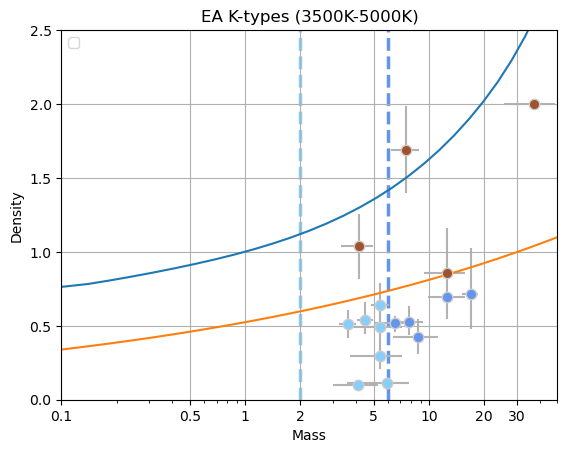

In [195]:
location_y_H2O = []; location_y_rocky = []
for i in range(0,len(density4)):
    location_y_H2O.append(float(spline_h20_calc_density(density4[i]/earth_density)))
    location_y_rocky.append(float(spline_earth_density(density4[i]/earth_density)))
                          
# Calculate the distances for all data points
dist_rocky = [abs(location_y_rocky[i] - density4[i] / earth_density) for i in range(len(mass4))]
dist_y_H2O = [abs(density4[i] / earth_density - location_y_H2O[i]) for i in range(len(mass4))]

rocky_density = []
water_density = []
puffy_density = []
density_rocky_equation4          = []
density_weight_rocky_equation4   = []
density_water_equation4          = []
density_weight_water_equation4   = []
density_puffy_equation4          = []
density_weight_puffy_equation4   = []
# Iterate over the data points
for i in range(0, len(mass4)):
    if mass4[i] <= 2 or dist_rocky[i] < dist_y_H2O[i]:
        plt.plot(mass4[i], density4[i] / earth_density, ".", color="sienna", markersize=15, zorder=10, mec="0.8")
        density_rocky_equation4.append(density4[i] / earth_density)
        density_weight_rocky_equation4.append(1.0 / np.sqrt(( (density_error_minus4[i])** 2 + density_error_plus4[i] ** 2)))
    if mass4[i] <= 6 and dist_rocky[i] > dist_y_H2O[i]:
        plt.plot(mass4[i], density4[i] / earth_density, ".", color="lightskyblue", markersize=15, zorder=10, mec="0.8")
        density_water_equation4.append(density4[i] / earth_density)
        density_weight_water_equation4.append(1.0 / np.sqrt(( (density_error_minus4[i])** 2 + density_error_plus4[i] ** 2)))
    if mass4[i] > 6 and dist_rocky[i] > dist_y_H2O[i]:
        plt.plot(mass4[i], density4[i] / earth_density, ".", color="cornflowerblue", markersize=15, zorder=10, mec="0.8")
        density_puffy_equation4.append(density4[i] / earth_density)
        density_weight_puffy_equation4.append(1.0 / np.sqrt(( (density_error_minus4[i])** 2 + density_error_plus4[i] ** 2)))

plt.plot(earth_like_rocky["Mass"], earth_like_rocky_density / earth_density)
plt.plot(earth_like_rocky["Mass"], H20_50_calc_density / earth_density)
plt.errorbar(mass4, density4 / earth_density, xerr=[mass_error_minus4, mass_error_plus4], yerr=[density_error_minus4, density_error_plus4], fmt='.', color='0.7', zorder=-31)

plt.xlabel('Mass'); plt.xscale("log"); plt.ylim(0,2.5), plt.xlim(0.1,50); plt.ylabel('Density')
plt.grid(True); plt.title('EA K-types (3500K-5000K)')
plt.xticks([0.1,0.5,1,2,5,10,20, 30],["0.1","0.5","1","2","5","10","20", "30"],minor=False)
plt.vlines(2,0,20,colors = "lightskyblue",linestyle = "dashed",zorder=-32,linewidth = 2.5)
plt.vlines(6,0,20,colors = "cornflowerblue",linestyle = "dashed",zorder=-32,linewidth = 2.5)

leg = plt.legend(loc=2)
for line in leg.get_lines():
    line.set_linewidth(8.0)
    line.set_markersize(20)  # Adjust the marker size as needed

plt.show()
                                              

In [191]:
len(density_rocky_equation4)

4

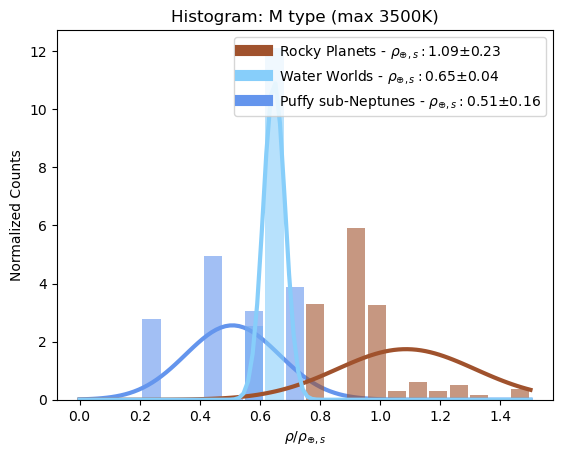

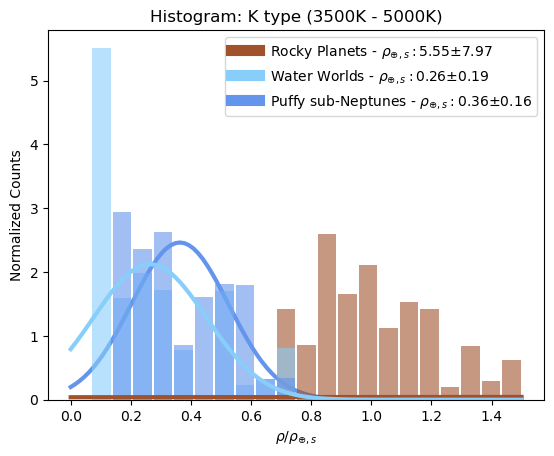

Text(0.5, 1.0, 'Histogram: K type (3500K - 5000K)')

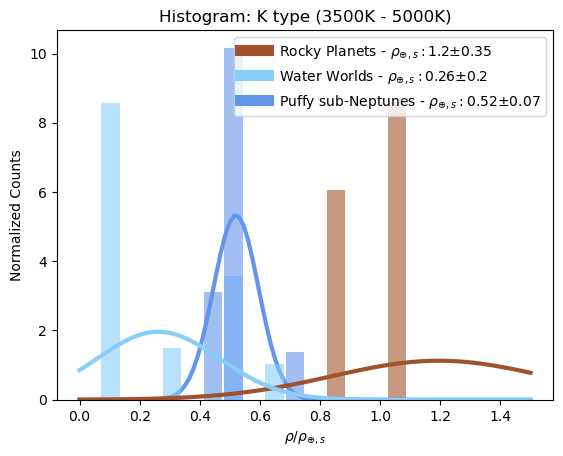

In [196]:
bins  = np.linspace(0, 1.5, 23)
pbins = np.linspace(0, 1.5, 100)
density_weight_puffy_equation2 = np.nan_to_num(density_weight_puffy_equation2, nan=0.1)
density_weight_rocky_equation2 = np.nan_to_num(density_weight_rocky_equation2, nan=0.1)
plt.hist(density_rocky_equation2, bins=bins, color='sienna', alpha=0.6,rwidth =0.9,density= True,weights = density_weight_rocky_equation2)
plt.hist(density_water_equation2, bins=bins, color='lightskyblue', alpha=0.6,rwidth =0.9,density= True,weights = density_weight_water_equation2)
plt.hist(density_puffy_equation2, bins=bins, color='cornflowerblue', alpha=0.6,rwidth =0.9,density= True,weights = density_weight_puffy_equation2)

mu = np.average(density_rocky_equation2, weights=density_rocky_equation2)
sigma = np.sqrt(np.cov(density_rocky_equation2, aweights=density_rocky_equation2, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "sienna",linewidth=3)

mu = np.average(density_water_equation2, weights=density_weight_water_equation2)
sigma = np.sqrt(np.cov(density_water_equation2, aweights=density_weight_water_equation2, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Water Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "lightskyblue",linewidth=3)

mu = np.average(density_puffy_equation2, weights=density_weight_puffy_equation2)
sigma = np.sqrt(np.cov(density_puffy_equation2, aweights=density_weight_puffy_equation2, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Puffy sub-Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3,zorder=-20)
leg = plt.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{⊕,s}$')
plt.ylabel('Normalized Counts')
plt.title('Histogram: M type (max 3500K)')
plt.show()

bins  = np.linspace(0, 1.5, 23)
pbins = np.linspace(0, 1.5, 100)
density_weight_water_equation3 = np.nan_to_num(density_weight_water_equation3, nan=0.1)
density_weight_puffy_equation3 = np.nan_to_num(density_weight_puffy_equation3, nan=0.1)
density_weight_rocky_equation3 = np.nan_to_num(density_weight_rocky_equation3, nan=0.1)
plt.hist(density_rocky_equation3, bins=bins, color='sienna', alpha=0.6,rwidth =0.9,density= True,weights = density_weight_rocky_equation3)
plt.hist(density_water_equation3, bins=bins, color='lightskyblue', alpha=0.6,rwidth =0.9,density= True,weights = density_weight_water_equation3)
plt.hist(density_puffy_equation3, bins=bins, color='cornflowerblue', alpha=0.6,rwidth =0.9,density= True,weights = density_weight_puffy_equation3)

mu = np.average(density_rocky_equation3, weights=density_rocky_equation3)
sigma = np.sqrt(np.cov(density_rocky_equation3, aweights=density_rocky_equation3, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Rocky Planets - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "sienna",linewidth=3)

mu = np.average(density_water_equation3, weights=density_weight_water_equation3)
sigma = np.sqrt(np.cov(density_water_equation3, aweights=density_weight_water_equation3, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Water Worlds - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "lightskyblue",linewidth=3)

mu = np.average(density_puffy_equation3, weights=density_weight_puffy_equation3)
sigma = np.sqrt(np.cov(density_puffy_equation3, aweights=density_weight_puffy_equation3, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line,label ="Puffy sub-Neptunes - "+"$ρ_{⊕,s}:$"+str(np.round(mu,2))+"±"+str(np.round(sigma,2)),color = "cornflowerblue",linewidth=3,zorder=-20)
leg = plt.legend()

# change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{⊕,s}$')
plt.ylabel('Normalized Counts')
plt.title('Histogram: K type (3500K - 5000K)')
plt.show()

bins  = np.linspace(0, 1.5, 23)
pbins = np.linspace(0, 1.5, 100)
density_weight_water_equation4 = np.nan_to_num(density_weight_water_equation4, nan=0.1)
density_weight_puffy_equation4 = np.nan_to_num(density_weight_puffy_equation4, nan=0.1)
density_weight_rocky_equation4 = np.nan_to_num(density_weight_rocky_equation4, nan=0.1)
plt.hist(density_rocky_equation4, bins=bins, color='sienna', alpha=0.6, rwidth=0.9, density=True, weights=density_weight_rocky_equation4)
plt.hist(density_water_equation4, bins=bins, color='lightskyblue', alpha=0.6, rwidth=0.9, density=True, weights=density_weight_water_equation4)
plt.hist(density_puffy_equation4, bins=bins, color='cornflowerblue', alpha=0.6, rwidth=0.9, density=True, weights=density_weight_puffy_equation4)

mu = np.average(density_rocky_equation4, weights=density_weight_rocky_equation4)
sigma = np.sqrt(np.cov(density_rocky_equation4, aweights=density_weight_rocky_equation4, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line, label="Rocky Planets - " + "$ρ_{⊕,s}:$" + str(np.round(mu, 2)) + "±" + str(np.round(sigma, 2)), color="sienna", linewidth=3)

mu = np.average(density_water_equation4, weights=density_weight_water_equation4)
sigma = np.sqrt(np.cov(density_water_equation4, aweights=density_weight_water_equation4, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line, label="Water Worlds - " + "$ρ_{⊕,s}:$" + str(np.round(mu, 2)) + "±" + str(np.round(sigma, 2)), color="lightskyblue", linewidth=3)

mu = np.average(density_puffy_equation4, weights=density_weight_puffy_equation4)
sigma = np.sqrt(np.cov(density_puffy_equation4, aweights=density_weight_puffy_equation4, ddof=0))
best_fit_line = scipy.stats.norm.pdf(pbins, mu, sigma)
plt.plot(pbins, best_fit_line, label="Puffy sub-Neptunes - " + "$ρ_{⊕,s}:$" + str(np.round(mu, 2)) + "±" + str(np.round(sigma, 2)), color="cornflowerblue", linewidth=3, zorder=-20)
leg = plt.legend()

# Change the line width for the legend
for line in leg.get_lines():
    line.set_linewidth(8.0)

plt.xlabel('$ρ / ρ_{⊕,s}$')
plt.ylabel('Normalized Counts')
plt.title('Histogram: K type (3500K - 5000K)')


In [175]:
len(density_weight_rocky_equation3)

23

## Plot data

In [66]:

planet4      = []; planet_i4       = []; planet_eq4   = []; disc_year4 = []
radius4      = []; radius_up4      = []; radius_low4  = []; st_eff4    = []
mass4        = []; mass_up4        = []; mass_low4    = []
density4     = []; density_up4     = []; density_low4 = []
for i in range(0,len(planet_name_EA)):
    if radius_EA[i]<4 and 5000 < st_eff_EA[i] > 6000:
        if ((radius_unc_up_EA[i] + radius_unc_up_EA[i])*0.5) / radius_EA[i] < 0.33 and ((mass_unc_up_EA[i] + mass_unc_up_EA[i])*0.5) / mass_EA[i] < 0.33:
                st_eff4.append(st_eff_EA[i])
                planet_eq4.append(pl_eq_EA[i]); planet4.append(planet_name_EA[i]); disc_year4.append(disc_year_EA[i])
                radius4.append(dataEA.pl_rade[i]); radius_up4.append(dataEA.pl_radeerr1[i]); radius_low4.append(dataEA.pl_radeerr2[i])
                density4.append(dataEA.pl_dens[i]); density_up4.append(dataEA.pl_denserr1[i]); density_low4.append(dataEA.pl_denserr2[i])
                mass4.append(dataEA.pl_bmasse[i]); mass_up4.append(dataEA.pl_bmasseerr1[i]);  mass_low4.append(dataEA.pl_bmasseerr2[i])

mass_error_plus4    = mass_up4
mass_error_minus4   = np.abs(mass_low4)
density_error_plus4 = np.divide(density_up4,earth_density)
density_error_minus4= np.divide(np.abs(density_low4),earth_density)
radius_error_plus4  = radius_up4
radius_error_minus4 = np.abs(radius_low4)


planet5      = []; planet_i5       = []; planet_eq5   = []; disc_year5 = []
radius5      = []; radius_up5      = []; radius_low5  = []; st_eff5    = []
mass5        = []; mass_up5        = []; mass_low5    = []
density5     = []; density_up5     = []; density_low5 = []
for i in range(0,len(planet_name_EA)):
    if ((radius_unc_up_EA[i] + radius_unc_up_EA[i])*0.5) / radius_EA[i] < 0.33 and radius_EA[i]<4 and 6000< st_eff_EA[i] <7500:
        if ((mass_unc_up_EA[i] + mass_unc_up_EA[i])*0.5) / mass_EA[i] < 0.33:
            if planet_name_EA[i] not in planet:
                st_eff5.append(st_eff_EA[i])
                planet_eq5.append(pl_eq_EA[i]); planet5.append(planet_name_EA[i]); disc_year5.append(disc_year_EA[i])
                radius5.append(dataEA.pl_rade[i]); radius_up5.append(dataEA.pl_radeerr1[i]); radius_low5.append(dataEA.pl_radeerr2[i])
                density5.append(dataEA.pl_dens[i]); density_up5.append(dataEA.pl_denserr1[i]); density_low5.append(dataEA.pl_denserr2[i])
                mass5.append(dataEA.pl_bmasse[i]); mass_up5.append(dataEA.pl_bmasseerr1[i]);  mass_low5.append(dataEA.pl_bmasseerr2[i])

mass_error_plus5    = mass_up5
mass_error_minus5   = np.abs(mass_low5)
density_error_plus5 = np.divide(density_up5,earth_density)
density_error_minus5= np.divide(np.abs(density_low5),earth_density)
radius_error_plus5  = radius_up5
radius_error_minus5 = np.abs(radius_low5)

relative_mass_error1 = [error / mass_val if mass_val != 0 else 0 for mass_val, error in zip(mass, mass_error_plus)]
relative_density_error1 = [error / density_val if density_val != 0 else 0 for density_val, error in zip(np.divide(density, earth_density), density_error_plus)]
relative_radius_error1 = [error / radius_val if radius_val != 0 else 0 for radius_val, error in zip(radius, radius_error_plus)]

relative_mass_error2 = [error / mass_val if mass_val != 0 else 0 for mass_val, error in zip(mass2, mass_error_plus2)]
relative_density_error2 = [error / density_val if density_val != 0 else 0 for density_val, error in zip(np.divide(density2, earth_density), density_error_plus2)]
relative_radius_error2 = [error / radius_val if radius_val != 0 else 0 for radius_val, error in zip(radius2, radius_error_plus2)]

relative_mass_error3 = [error / mass_val if mass_val != 0 else 0 for mass_val, error in zip(mass3, mass_error_plus3)]
relative_density_error3 = [error / density_val if density_val != 0 else 0 for density_val, error in zip(np.divide(density3, earth_density), density_error_plus3)]
relative_radius_error3 = [error / radius_val if radius_val != 0 else 0 for radius_val, error in zip(radius3, radius_error_plus3)]

relative_mass_error4 = [error / mass_val if mass_val != 0 else 0 for mass_val, error in zip(mass4, mass_error_plus4)]
relative_density_error4 = [error / density_val if density_val != 0 else 0 for density_val, error in zip(np.divide(density4, earth_density), density_error_plus4)]
relative_radius_error4 = [error / radius_val if radius_val != 0 else 0 for radius_val, error in zip(radius4, radius_error_plus4)]

relative_mass_error5 = [error / mass_val if mass_val != 0 else 0 for mass_val, error in zip(mass5, mass_error_plus5)]
relative_density_error5 = [error / density_val if density_val != 0 else 0 for density_val, error in zip(np.divide(density5, earth_density), density_error_plus5)]
relative_radius_error5 = [error / radius_val if radius_val != 0 else 0 for radius_val, error in zip(radius5, radius_error_plus5)]



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


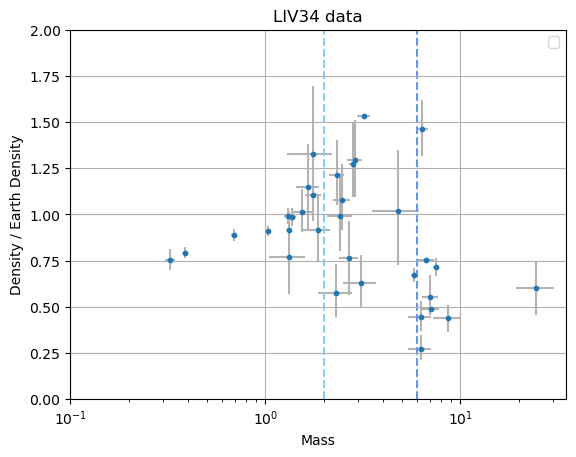

In [69]:
plt.plot(mass2,density2/earth_density,".")
mass_err            = [np.abs(mass_low2),mass_up2]
density_err         = [np.abs(density_low2)/earth_density,density_up2/earth_density]
plt.errorbar(mass2, density2/earth_density,xerr = mass_err,yerr = density_err,fmt='.', color='0.7',zorder=-32)
plt.xlabel('Mass'); plt.xscale("log"); plt.ylim(0,4), plt.xlim(0,40)
plt.vlines(2,0,2,colors = "lightskyblue",linestyle = "dashed",zorder=-32)
plt.vlines(6,0,2,colors = "cornflowerblue",linestyle = "dashed",zorder=-32)
plt.ylim(0,2), plt.xlim(0.1,35)
plt.ylabel('Density / Earth Density')
plt.legend()
plt.grid(True)
plt.title('LIV34 data')
leg = plt.legend()